# PyTorch 기초 실습

파이토치 모듈 임포트

In [ ]:
import torch

## 텐서(Tensor)

숫자가 들어있는 배열, PyTorch에서는 `torch.Tensor()`로 생성

차원(Dimension)별 텐서의 의미

| 이름    | 설명               | 예시                                      | `shape`           |
| ----- | ---------------- | --------------------------------------- | ----------------- |
| 스칼라   | 숫자 하나            | `3`                                     | `()`              |
| 벡터    | 숫자들의 나열 (1차원)    | `[1, 2, 3]`                             | `(3,)`            |
| 행렬    | 2차원 표 형태의 숫자 배열  | `[[1, 2], [3, 4]]`                      | `(2, 2)`          |
| 3D 텐서 | 여러 개의 행렬이 쌓인 형태  | `[[[1,2],[3,4]], [[5,6],[7,8]]]`        | `(2, 2, 2)`       |
| 4D 텐서 | 이미지 배치 등에서 자주 사용 | `(배치, 채널, 높이, 너비)` 예: `(32, 1, 28, 28)` | `(32, 1, 28, 28)` |


PyTorch의 `torch.Tensor`는 넘파이 배열과 유사하며, GPU에서 연산이 가능합니다.

### 텐서 생성 및 연산

In [ ]:
import torch

# 텐서 생성
a = torch.tensor(3.0)
b = torch.tensor([1.0, 2.0, 3.0])
c = torch.tensor([[1, 2], [3, 4]])

print('a:', a)
print('b:', b)
print('c:', c)

# 기본 연산
print('b + 1:', b + 1) # tensor([2., 3., 4.])
print('c * 2:', c * 2) # tensor([[2, 4],[6, 8]])
print('c Transpose:', c.T) # tensor([[1, 3],[2, 4]])


## 자동 미분(Autograd)



### 딥러닝의 학습

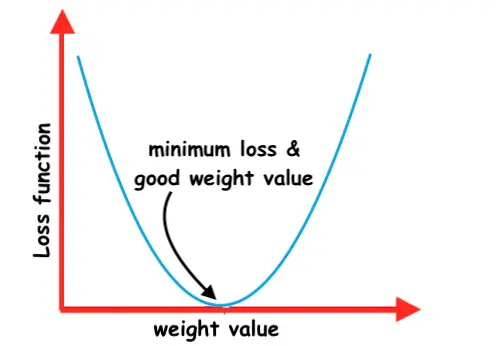

딥러닝은 **손실(loss)**가 작아지는 방향으로 **가중치(weight)**를 조정해가며 학습합니다.

*(최적의 가중치 찾기!)*

이를 위해 손실 함수의 **기울기(gradient)**를 계산하여 가중치를 업데이트합니다.

다음은 가장 기본적인 방법인 **경사하강법(Gradient descent)**의 수식입니다.

$$
w=w−\eta⋅ \frac{\partial L}{\partial w}
$$

- $w$: 현재 가중치
- $\eta$: **학습률(learning rate)**
- $\frac{\partial L}{\partial w}$: 손실 함수 $L$을 가중치 $w$에 대해 미분한 값

--> **기울기의 반대 방향으로 가중치를 조금씩 조정**하여 오차를 줄여가는 과정




### 자동미분(Autograd)

자동으로 미분을 계산해주는 기능

* PyTorch에서 `.backward()`를 호출하면 미분값(수식의 기울기, gradient)을 자동으로 계산하고, 각 텐서의 기울기는 `.grad` 속성에 저장됨

* 계산된 gradient `.grad`를 이용하여 **손실 함수(loss)**에 대해 **모델의 가중치(parameter)**를 업데이트하며 학습

  (가중치의 변화 방향과 크기 결정)

* 텐서의 `.requires_grad=True` 옵션을 설정하여 사용가능


In [ ]:
x = torch.tensor([2.0], requires_grad=True)
y = x ** 2 + 3 * x + 1  # 수식: x^2 + 3x + 1

y.backward()  # 미분

print(f"dy/dx at x=2: {x.grad}")  # dy/dx = 2x + 3 → 2*2 + 3 = 7


### 자동미분 실습

(1) 텐서 생성

In [ ]:
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)

(2) 계산 그래프 빌드

![대체 텍스트](https://i.imgur.com/iUhWEj2.png)

In [ ]:
y = w * x + b    # y = 2 * x + 3

(3) 그라디언트 계산

In [ ]:
# 그라디언트 계산
y.backward()

# 결과 출력
print(x.grad)    # x.grad = 2
print(w.grad)    # w.grad = 1
print(b.grad)    # b.grad = 1

## 자동미분부터 가중치 업데이트까지 실습

입력의 크기가 `(10,3)`이고 출력이 `(10,2)`인 선형모델을 학습합니다.

손실함수로 MSE(Mean squared error)를 사용하고, 옵티마이저로 [SGD(Stochastic gradient descent, 확률적 경사 하강법)](https://everyday-deeplearning.tistory.com/entry/SGD-Stochastic-Gradient-Descent-%ED%99%95%EB%A5%A0%EC%A0%81-%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95)를 사용합니다.

`learning rate`는 `0.01`로 설정합니다.



(0) 모듈 임포트

In [ ]:
import torch
import torch.nn as nn # 모델 라이브러리
import numpy as np

(1) 텐서 생성

`torch.randn(사이즈)`: 정규분포에서 랜덤한 텐서 생성(설명: https://docs.pytorch.org/docs/stable/generated/torch.randn.html)

In [ ]:
x = torch.randn(10, 3)
y = torch.randn(10, 2)

In [ ]:
# 데이터 확인
print(x)
print(y)

(2) 선형모델-Fully connected layer 정의

In [ ]:
linear = nn.Linear(3, 2)

# 랜덤으로 초기화되어있는 모델의 가중치 및 바이어스
print ('w: ', linear.weight)
print ('b: ', linear.bias)

(3) 손실 함수 및 옵티마이저 설정

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

(4) Forward pass

In [ ]:
pred = linear(x)

print(pred)

(5) Loss 계산

In [ ]:
loss = criterion(pred, y) # 손실함수에 예측과 정답을 입력하여 손실 계산
print('loss: ', loss.item())

In [ ]:
# 직접 계산과 비교(소숫점 약 5~6자리까지 동일한 결과가 나올 것입니다)
np.mean(np.square(pred.detach().numpy()-y.numpy()))

(6) **Backward pass(역전파)**

In [ ]:
loss.backward()

(7) **1-step gradient descent**

$w=w−\eta⋅ \frac{\partial L}{\partial w}
$

lr=0.01



기존 모델(가중치 및 바이어스)과 미분값

In [ ]:
print ('w: ', linear.weight)
print ('b: ', linear.bias)

In [ ]:
print ('dL/dw: ', linear.weight.grad)
print ('dL/db: ', linear.bias.grad)

업데이트 예측-직접 계산
weight - learning_rate * gradient

In [ ]:
linear.weight - 0.01 * linear.weight.grad

**업데이트**

In [ ]:
optimizer.step()

In [ ]:
# 업데이트 결과 확인 - 위 예측과 동일하거나 거의 유사한 결과가 나와야 합니다.
print ('w: ', linear.weight)
print ('b: ', linear.bias)

(8) 1-step 학습 후의 loss 확인

In [ ]:
pred = linear(x)
loss = criterion(pred, y)
print('loss after 1 step optimization: ', loss.item())

loss의 변화를 확인할 수 있습니다.

아마도 미세한 감소가 발생했을 것입니다.

------------------

# Linear Regression 실습

위 실습을 정리해보면, 파이토치를 이용한 모델 학습 과정을 대략 확인할 수 있습니다.


> 데이터(텐서) 생성 → 모델(선형 모델) 정의 → 손실 함수(loss function) 및 옵티마이저(optimizer) 설정
→ 순전파(forward pass) → 손실(loss) 계산 → 역전파(backward pass, gradient 계산)
→ 옵티마이저로 가중치 업데이트





1. 데이터(텐서) 생성
→ 학습에 사용할 입력 데이터와 정답(레이블)을 텐서로 준비합니다.

2. 모델(선형 모델 등) 정의
→ `nn.Module`을 이용해 학습할 모델(예: 선형 회귀)을 정의합니다.

3. 손실 함수 및 옵티마이저 설정
→ 예측값과 정답의 차이를 계산할 손실 함수,
가중치를 업데이트할 옵티마이저(예: SGD)를 선택합니다.

4. 순전파 (Forward Pass)
→ 입력 데이터를 모델에 넣어 예측값을 계산합니다.

5. 손실(loss) 계산
→ 예측값과 정답 간의 차이를 손실 함수로 계산합니다.

6. 역전파 (Backward Pass)
→ `.backward()`를 호출하여 손실 함수의 기울기(gradient)를 자동으로 계산합니다.

7. 가중치 업데이트
→ 옵티마이저의 `.step()`으로 기울기를 이용해 가중치를 조정합니다.

이 과정을 여러 번 반복하며 학습이 진행됩니다.

In [ ]:
# 코드 정리

# 텐서 생성
x = torch.randn(10, 3)
y = torch.randn(10, 2)

# 모델 정의
linear = nn.Linear(3, 2)

# 손실함수 및 옵티마이저
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

# Forward pass - 예측
pred = linear(x)

# Loss 계산
loss = criterion(pred, y)
print('loss: ', loss.item())

# Backward pass & Update
loss.backward()
optimizer.step()

# 1step 학습 후 다시 예측 & 손실 변화 확인
pred = linear(x)
loss = criterion(pred, y)
print('loss after 1 step optimization: ', loss.item())

위 코드를 기반으로 확장한 간단한 Linear regression 모델 실습은 다음 노트북을 확인해주세요.

[PyTorch Linear Regression 실습 노트북
](2-PyTorch_Linear_Regression_실습.ipynb)




비선형 모델 및 모델 셀렉션은 다음 노트북을 열어주세요.

[비선형 모델 및 모델 셀렉션 실습 노트북](3-비선형_모델_및_모델_셀렉션_실습_노트북.ipynb)